# Unit test for staNMF

In [1]:
from staNMF import instability
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
n, d, K = 100, 100, 10
D = np.maximum(np.random.normal(size = (n, K)),0)
A = np.maximum(np.random.normal(size = (K, d)),0)
X = D @ A + np.random.normal(0, 1, size = (n,d))
mask = np.random.choice([0, 1], p=[.9, .1], size = (n, d))
masked_X = X #- 1000 * mask 

In [3]:
ins = instability(masked_X.T, n_trials=10, folder_name='tmp', random_state=1000)

In [4]:
Ks = list(range(6, 15))
output = ins.fit_transform(Ks, parallel = False)
output

array([[5.46552509e-02, 2.28682741e-02],
       [6.64850637e-07, 2.49358039e-07],
       [4.28244989e-02, 2.04535303e-02],
       [7.34472552e-07, 2.86149583e-07],
       [7.58975793e-07, 2.80971086e-07],
       [5.78185066e-02, 6.18838729e-03],
       [9.52566185e-02, 1.01876898e-02],
       [1.16150706e-01, 1.20257078e-02],
       [1.29022146e-01, 1.59732757e-02]])

Text(0.5, 1.0, 'instability for different Ks')

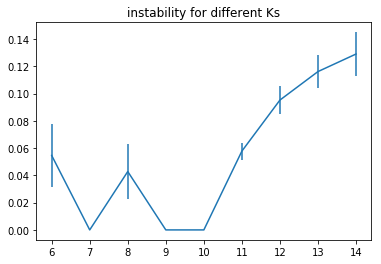

In [5]:
plt.errorbar(x = Ks, y = output[:,0], yerr=output[:,1])
plt.title('instability for different Ks')

## test cross validation

In [6]:
Ks = list(range(6, 15))
output = ins.transform_cv(Ks, nfolds=2)
output

Calculating prediction instability for 6
num_samples larger than total_sample, force it to be smaller.
Calculating prediction instability for 7
Calculating prediction instability for 8
Calculating prediction instability for 9
Calculating prediction instability for 10
Calculating prediction instability for 11
Calculating prediction instability for 12
Calculating prediction instability for 13
Calculating prediction instability for 14


array([[3.61523966e-01, 4.50481149e-04],
       [3.45691510e-01, 1.35724994e-05],
       [3.28955790e-01, 1.19342476e-03],
       [3.17988318e-01, 1.44286931e-06],
       [3.13576480e-01, 3.10926873e-05],
       [3.15598736e-01, 7.76090566e-04],
       [3.15741382e-01, 1.14056829e-03],
       [3.18604038e-01, 9.81285044e-04],
       [3.21262845e-01, 2.23621291e-03]])

Text(0.5, 1.0, 'MSE for different Ks')

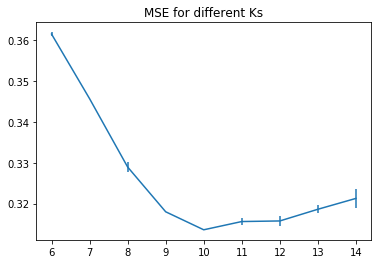

In [7]:
plt.errorbar(x = Ks, y = output[:,0], yerr=output[:,1])
plt.title('MSE for different Ks')

## test parallel

In [13]:
%timeit ins.fit(Ks, parallel = True, processes = len(Ks))

4.19 s ± 79.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit ins.fit(Ks, parallel = False)

6.67 s ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
